# 时间序列处理

In [64]:
from dateutil.parser import parse
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [65]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])

In [66]:
cur = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/MarketArrivals.csv')

In [67]:
df

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869
...,...,...
199,2008-02-01,21.654285
200,2008-03-01,18.264945
201,2008-04-01,23.107677
202,2008-05-01,22.912510


### 时间序列的可视化

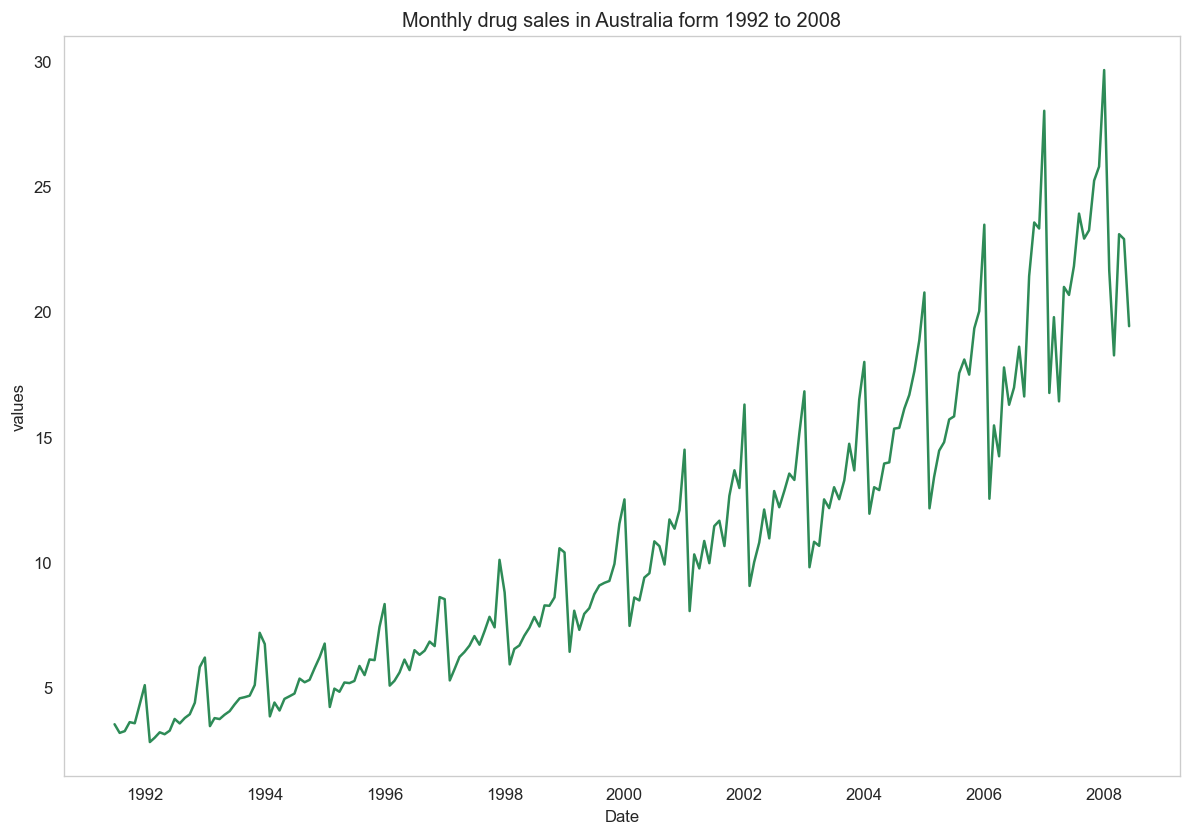

In [68]:
plt.figure(figsize=(12, 8), dpi=120)
plt.title('Monthly drug sales in Australia form 1992 to 2008')
plt.plot(df['date'], df['value'], color='seagreen')
plt.xlabel('Date')
plt.ylabel('values')
plt.grid(False)
plt.show()

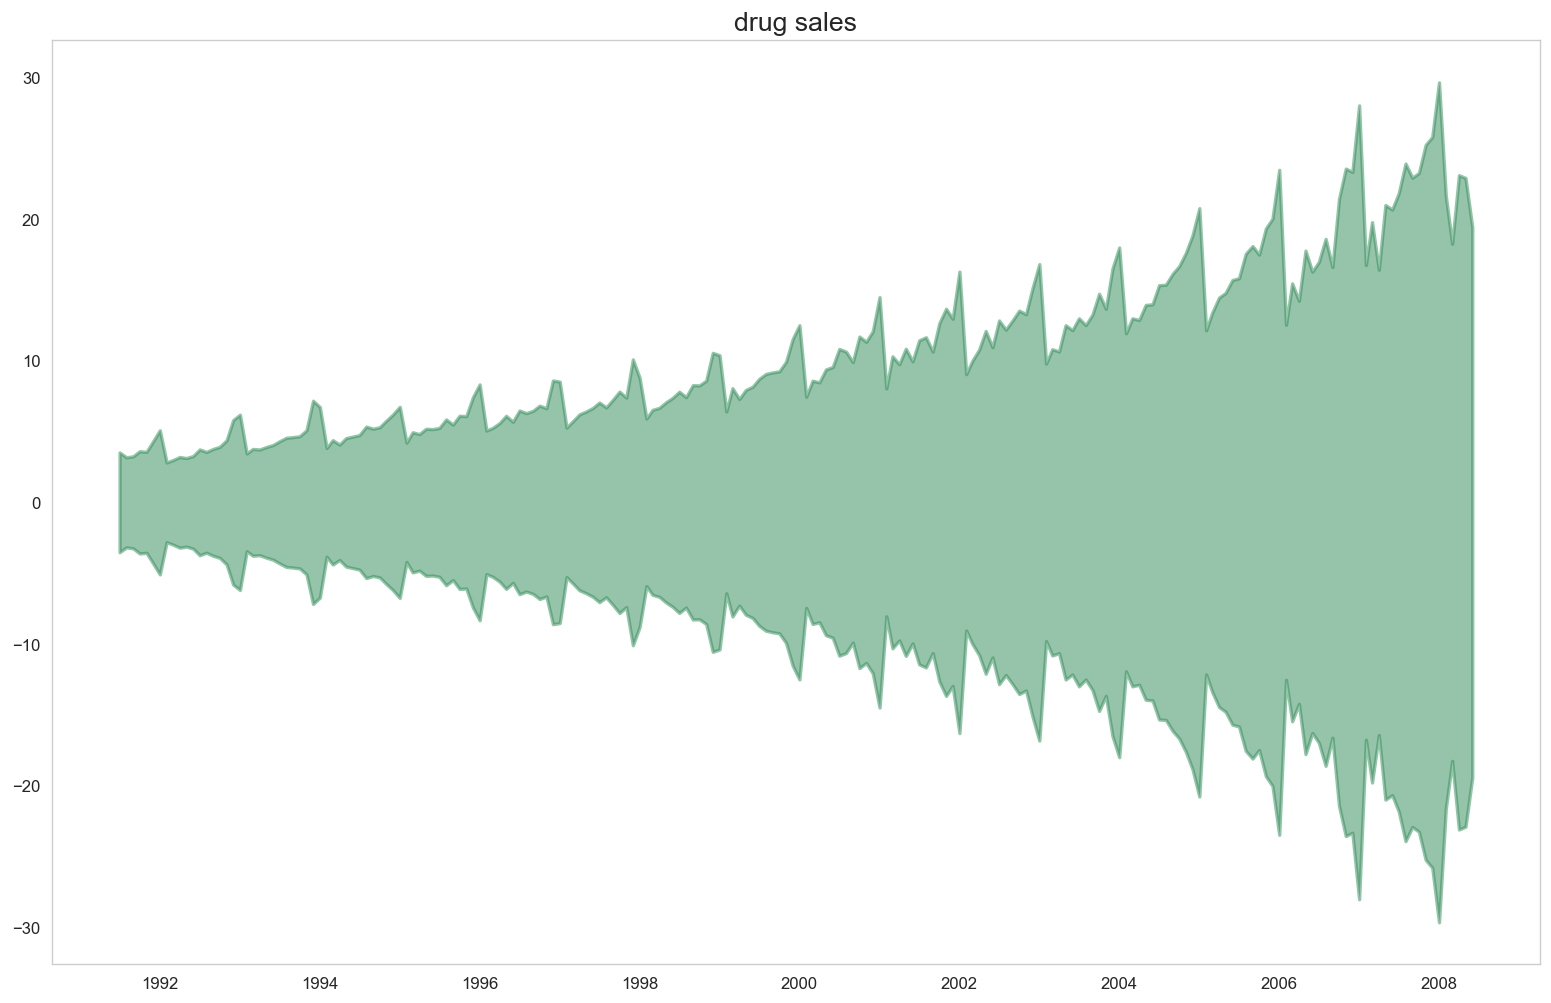

In [69]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10), dpi=120)
plt.fill_between(x=df['date'], y1=df['value'], y2=-df['value'], alpha=0.5, linewidth=2, color='seagreen')
# plt.ylim(-15,15)
plt.title('drug sales', fontsize=16)
plt.grid(False)
plt.show()

**时间序列的季节图**

In [70]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])

In [71]:
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


`strftime()`:该函数用于将日期转化为字符串表示的日期

TypeError: _make_class_factory.<locals>.class_factory.<locals>.subcls.set() takes 1 positional argument but 3 were given

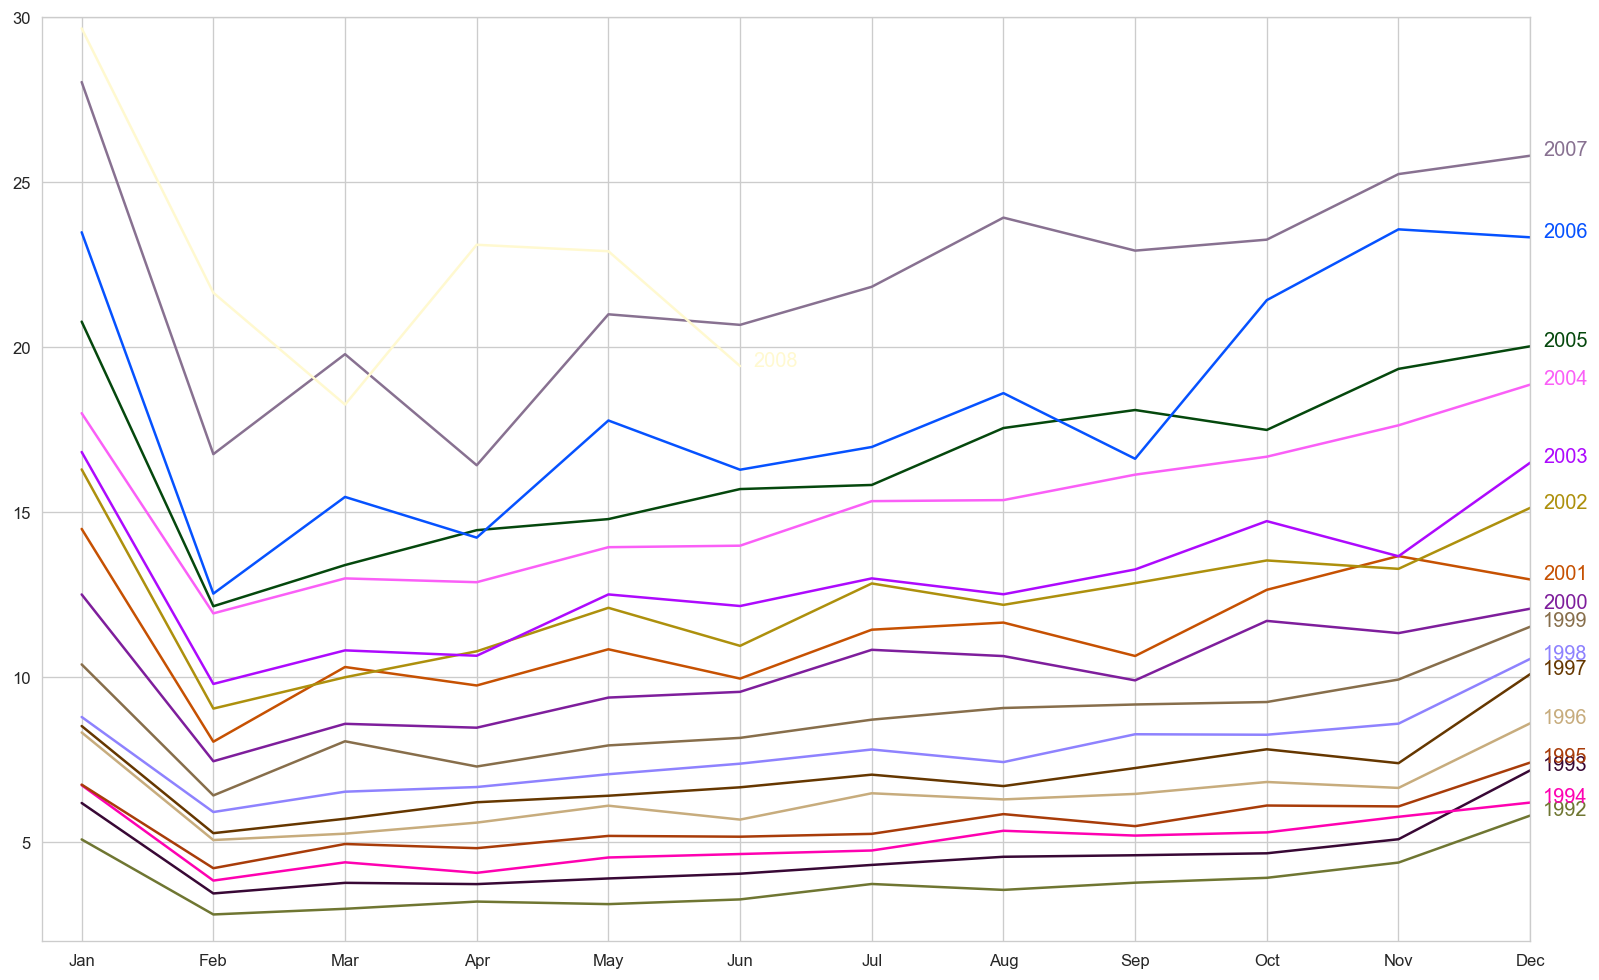

In [72]:
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years))

plt.figure(figsize=(16, 10), dpi=120)
for i, y in enumerate(years):
    if i > 0:
        plt.plot('month', 'value', data=df.loc[df.year == y, :], color=mycolors[i])
        plt.text(df.loc[df.year == y, :].shape[0] - .9, df.loc[df.year == y, 'value'][-1:].values[0], y, fontsize=12,
                 color=mycolors[i])
plt.gca().set(plt.xlim(-0.3, 11), plt.ylim(2, 30), ylabel='$DrugSales$', xlabel='Months')
plt.show()

### 绘制箱线图

<AxesSubplot: xlabel='month', ylabel='value'>

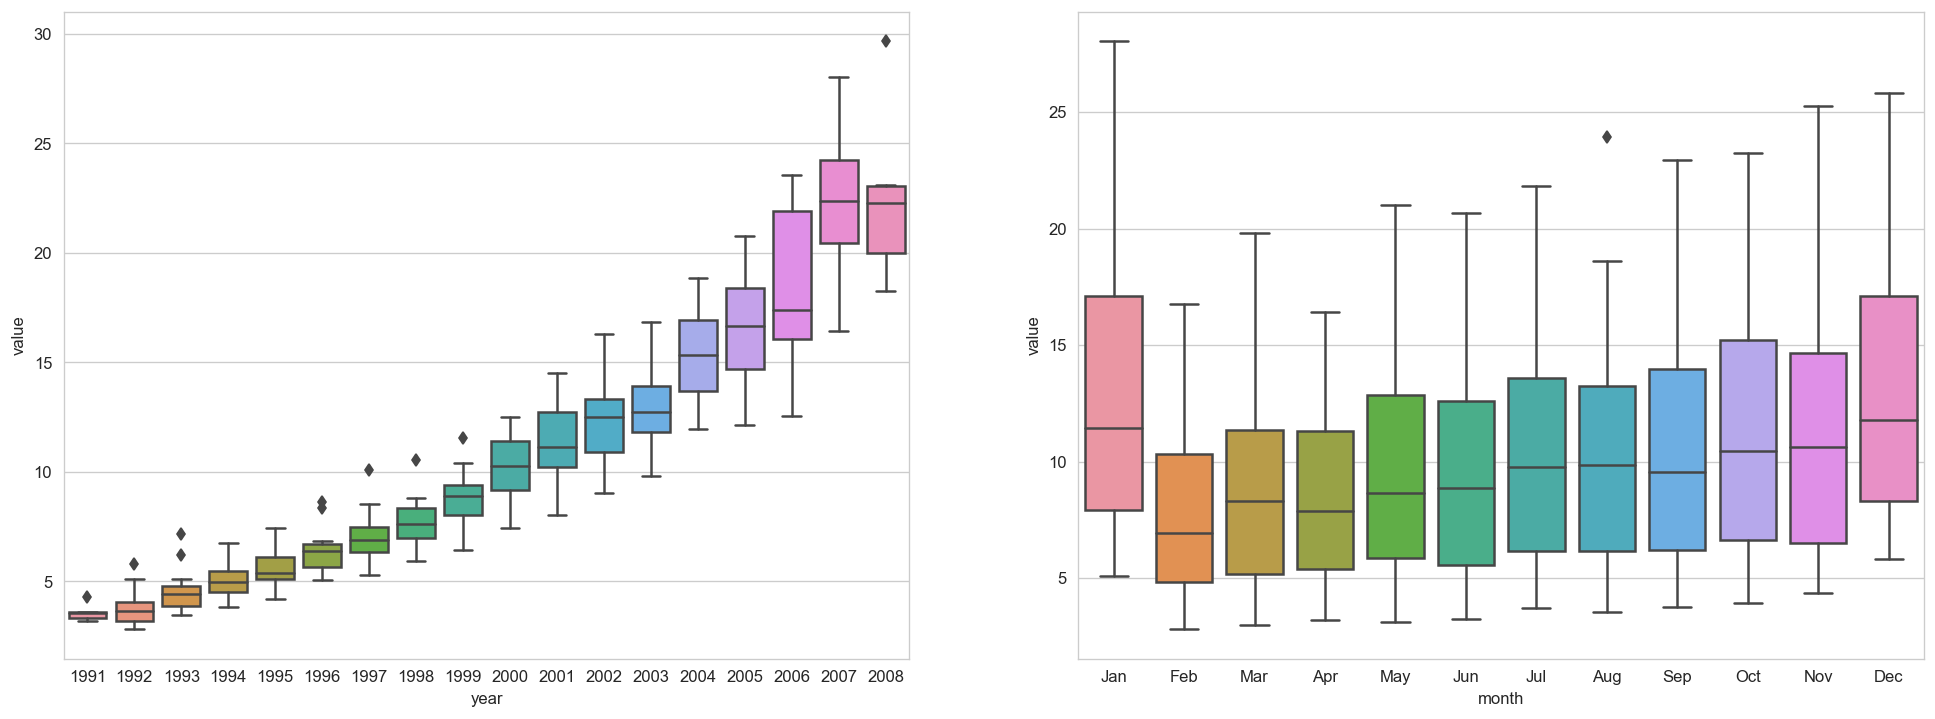

In [73]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7), dpi=120)
sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :])

In [74]:
df.loc[~df.year.isin([1991, 2008]), :]

,date,value,year,month
6,1992-01-01,5.088335,1992,Jan
7,1992-02-01,2.814520,1992,Feb
8,1992-03-01,2.985811,1992,Mar
9,1992-04-01,3.204780,1992,Apr
10,1992-05-01,3.127578,1992,May
...,...,...,...,...
193,2007-08-01,23.930204,2007,Aug
194,2007-09-01,22.930357,2007,Sep
195,2007-10-01,23.263340,2007,Oct
196,2007-11-01,25.250030,2007,Nov


In [75]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [87]:
df.index = df['date']

,date,value,year,month
date,,,,
1991-07-01,1991-07-01,3.526591,1991,Jul
1991-08-01,1991-08-01,3.180891,1991,Aug
1991-09-01,1991-09-01,3.252221,1991,Sep
1991-10-01,1991-10-01,3.611003,1991,Oct
1991-11-01,1991-11-01,3.565869,1991,Nov
...,...,...,...,...
2008-02-01,2008-02-01,21.654285,2008,Feb
2008-03-01,2008-03-01,18.264945,2008,Mar
2008-04-01,2008-04-01,23.107677,2008,Apr


In [93]:
df = df.drop(['date', 'year', 'month'], axis=1)

KeyError: "['date', 'year', 'month'] not found in axis"

In [95]:
df

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
...,...
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677


### 分别使用乘法分解和加法分解来观察时间序列,得到结果:趋势,季节性变化,残差

In [97]:
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')  #乘法分解
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')

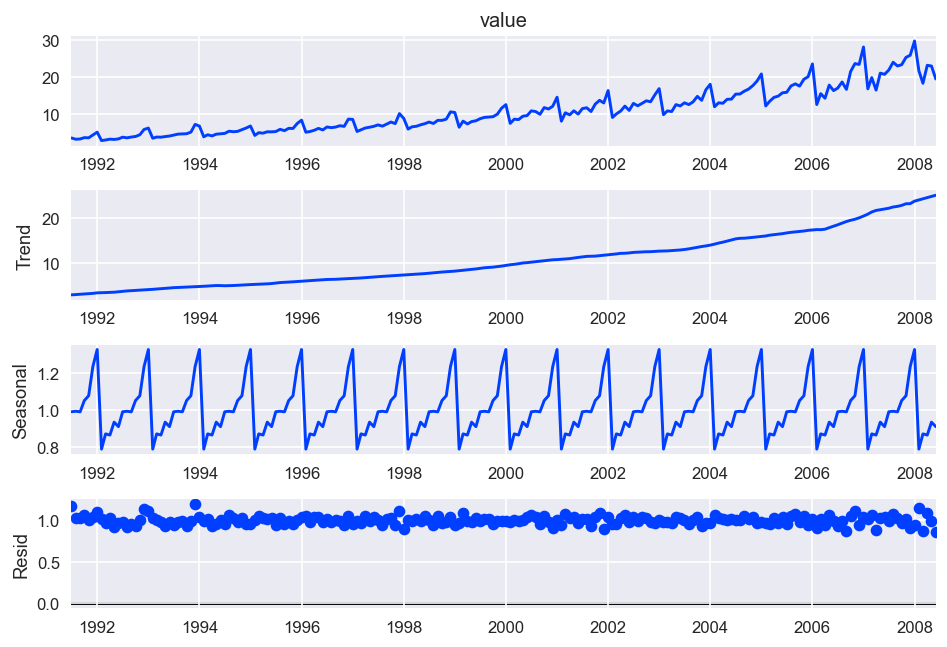

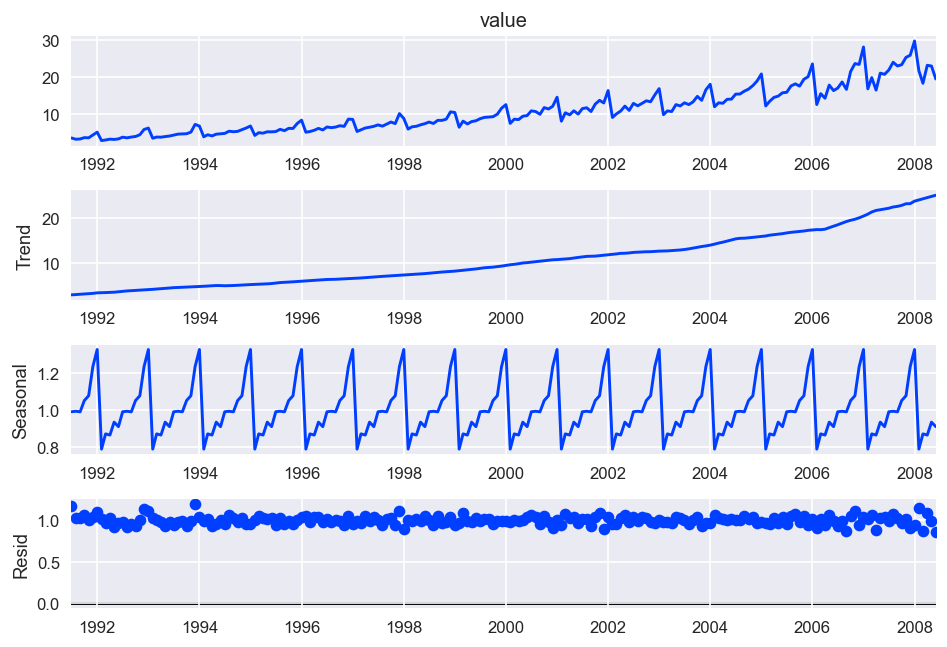

In [103]:
# result_add.plot()
# mpl.rcParams.update({'s':2})
# plt.rc('scatters',)
result_mul.plot()

### 非平稳数据平稳化
显然,我们所使用的数据序列是非平稳的,为了提升预测的准确性,我们需要对非平稳序列进行平稳化处理

In [105]:
from statsmodels.tsa.stattools import adfuller, kpss

In [107]:
result = adfuller(df, autolag='AIC')
result

(3.14518568930675,
 1.0,
 15,
 188,
 {'1%': -3.465620397124192,
  '5%': -2.8770397560752436,
  '10%': -2.5750324547306476},
 549.6705685364172)

In [108]:
result = kpss(df, regression='c')
result

(2.0131256386303322,
 0.01,
 9,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

**白噪音与平稳序列之间的差别:白噪不是时间的函数,他的均值和方差不随时间变化,白噪音完全随机,均值为$0$,从数学上来讲,均值为$0$的完全随机的数字序列就是白噪音**

Text(0.5, 1.0, '通过最小平方差拟合来去趋势化')

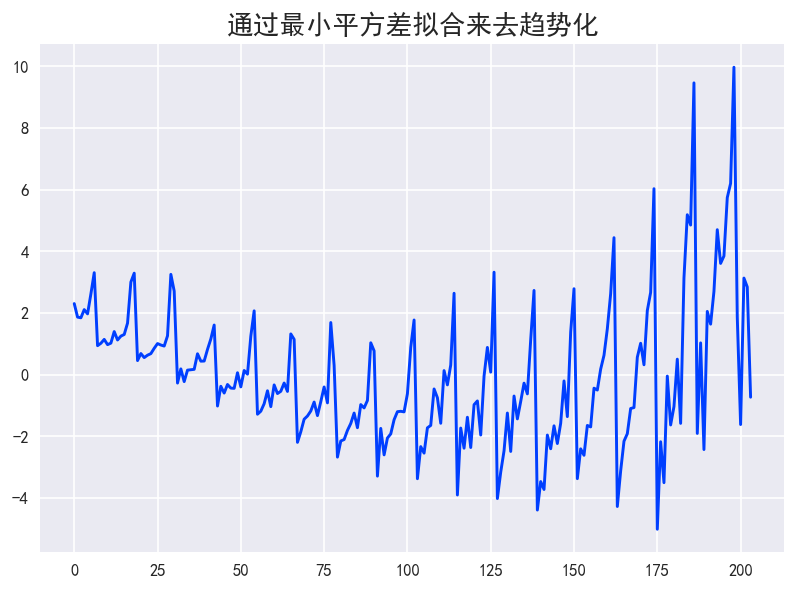

In [122]:
# Using scipy: Subtract the line of best fit
from scipy import signal

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
detrended = signal.detrend(df.value.values)
# detrend(): remove the linear trend from axis
plt.plot(detrended)
plt.title('通过最小平方差拟合来去趋势化', fontsize=16)

In [124]:
df.index = df['date']
df = df.drop('date', axis=1)

Text(0.5, 1.0, '通过最小二乘拟合来使时间序列去趋势化')

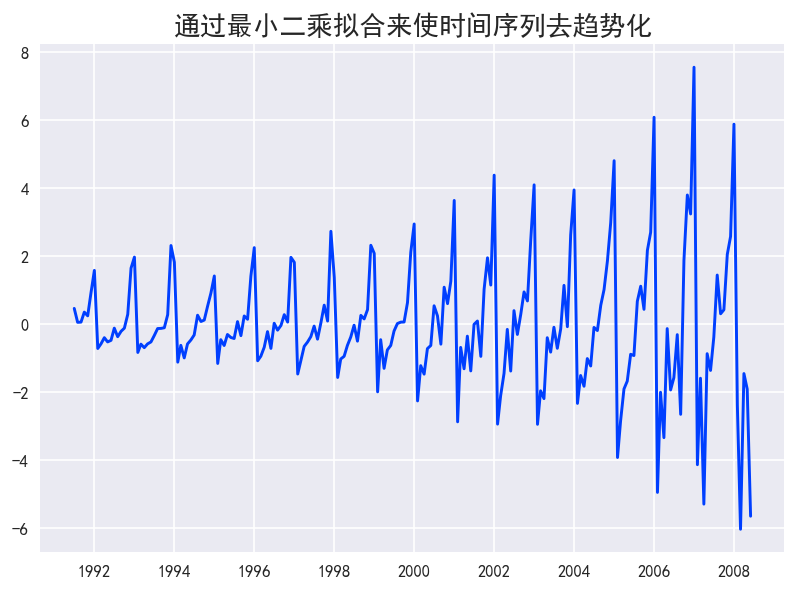

In [125]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')
detrended = df.value.values - result_mul.trend
plt.plot(detrended)
plt.title('通过最小二乘拟合来使时间序列去趋势化', fontsize=16)

### 时间序列去季节化
1. 取一个长度为季节窗口的移动平均线,是序列变得平滑
2. 序列季节性差分(从当前值减去前一季节的数值)
3. 将序列值除以从STL分解当中获得的季节性指数

Text(0.5, 1.0, '药品销售序列去季节化')

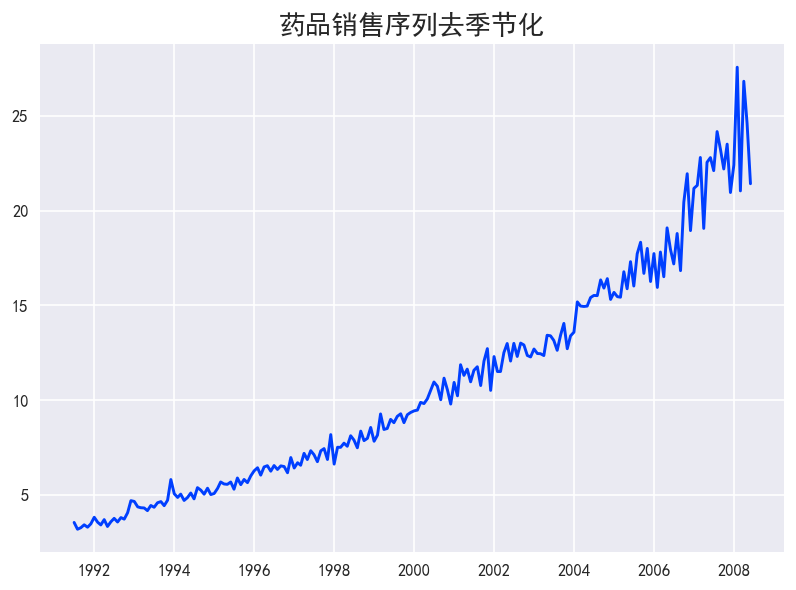

In [128]:
# 去季节化
deseasonlize = df.value.values / result_mul.seasonal
plt.plot(deseasonlize)
plt.title('药品销售序列去季节化', fontsize=16)

### 检验时间序列的季节性

<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

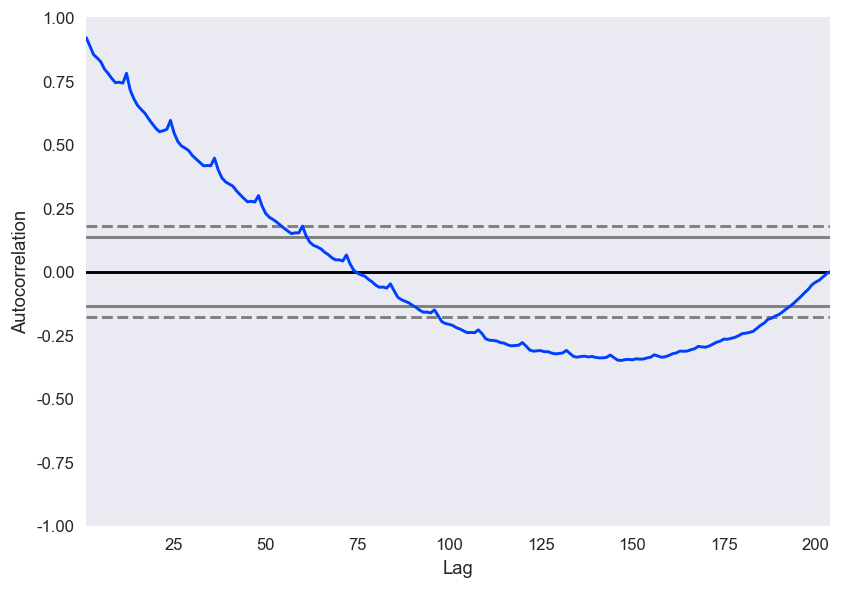

In [142]:
from pandas.plotting import autocorrelation_plot
plt.style.use('seaborn-darkgrid')
# plt.rcParams['fig'] = 'w'
# autocorrelation: 时间序列的autocorrelation,也就是自相关系数
autocorrelation_plot(df)

### 自相关系数和偏自相关系数

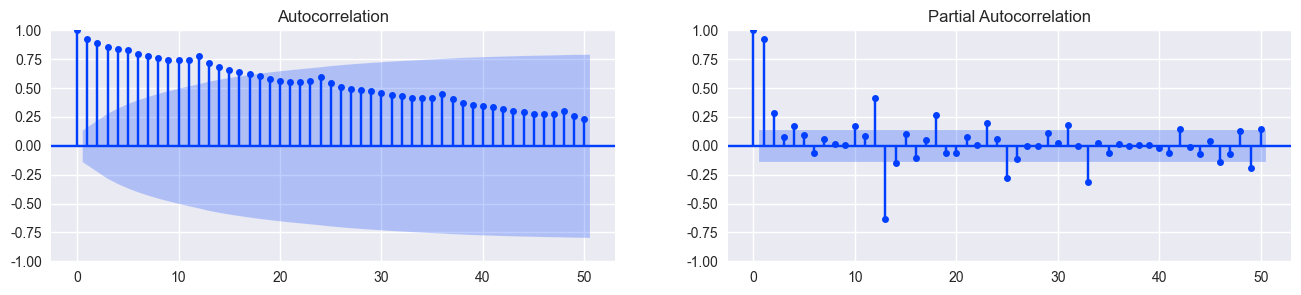

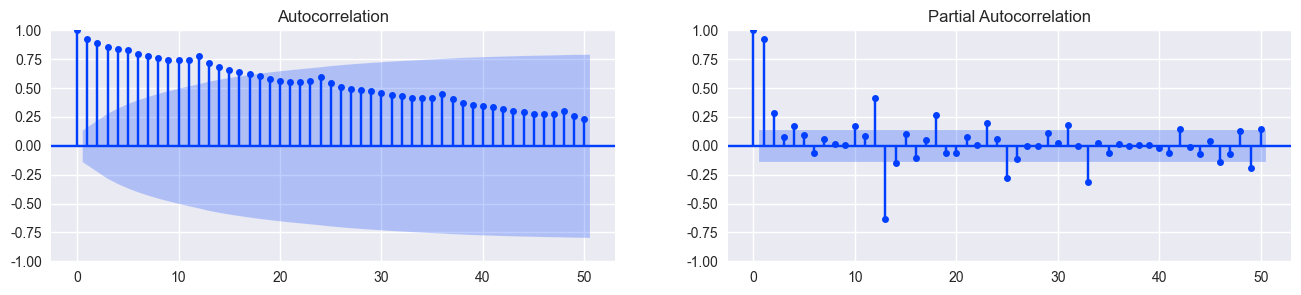

In [143]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')

# Calculate ACF and PACF upto 50 lags
# acf_50 = acf(df.value, nlags=50)
# pacf_50 = pacf(df.value, nlags=50)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df.value.tolist(), lags=50, ax=axes[0])
plot_pacf(df.value.tolist(), lags=50, ax=axes[1])

### 缺失值的填充
向后填充；
线性内插；
二次内插；
最邻近平均值；
对应季节的平均值。


 缺失值处理

你也可以根据你想实现的精确程度考虑接下来的方法。

1. 如果你有解释变量，可以使用像随机森林或k-邻近算法的预测模型来预测它。

2. 如果你有足够多的过去观测值，可以预测缺失值。

3. 如果你有足够的未来观测值，回测缺失值。

4. 从之前的周期预测相对应的部分。



In [ ]:
# # Generate dataset
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error
df_orig = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date').head(100)
df = pd.read_csv('datasets/a10_missings.csv', parse_dates=['date'], index_col='date')

fig, axes = plt.subplots(7, 1, sharex=True, figsize=(10, 12))
plt.rcParams.update({'xtick.bottom' : False})

## 1. Actual -------------------------------
df_orig.plot(title='Actual', ax=axes[0], label='Actual', color='red', style=".-")
df.plot(title='Actual', ax=axes[0], label='Actual', color='green', style=".-")
axes[0].legend(["Missing Data", "Available Data"])

## 2. Forward Fill --------------------------
df_ffill = df.ffill()
error = np.round(mean_squared_error(df_orig['value'], df_ffill['value']), 2)
df_ffill['value'].plot(title='Forward Fill (MSE: ' + str(error) +")", ax=axes[1], label='Forward Fill', style=".-")

## 3. Backward Fill -------------------------
df_bfill = df.bfill()
error = np.round(mean_squared_error(df_orig['value'], df_bfill['value']), 2)
df_bfill['value'].plot(title="Backward Fill (MSE: " + str(error) +")", ax=axes[2], label='Back Fill', color='firebrick', style=".-")

## 4. Linear Interpolation ------------------
df['rownum'] = np.arange(df.shape[0])
df_nona = df.dropna(subset = ['value'])
f = interp1d(df_nona['rownum'], df_nona['value'])
df['linear_fill'] = f(df['rownum'])
error = np.round(mean_squared_error(df_orig['value'], df['linear_fill']), 2)
df['linear_fill'].plot(title="Linear Fill (MSE: " + str(error) +")", ax=axes[3], label='Cubic Fill', color='brown', style=".-")

## 5. Cubic Interpolation --------------------
f2 = interp1d(df_nona['rownum'], df_nona['value'], kind='cubic')
df['cubic_fill'] = f2(df['rownum'])
error = np.round(mean_squared_error(df_orig['value'], df['cubic_fill']), 2)
df['cubic_fill'].plot(title="Cubic Fill (MSE: " + str(error) +")", ax=axes[4], label='Cubic Fill', color='red', style=".-")

# Interpolation References:
# https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html
# https://docs.scipy.org/doc/scipy/reference/interpolate.html

## 6. Mean of 'n' Nearest Past Neighbors ------
def knn_mean(ts, n):
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            n_by_2 = np.ceil(n/2)
            lower = np.max([0, int(i-n_by_2)])
            upper = np.min([len(ts)+1, int(i+n_by_2)])
            ts_near = np.concatenate([ts[lower:i], ts[i:upper]])
            out[i] = np.nanmean(ts_near)
    return out

df['knn_mean'] = knn_mean(df.value.values, 8)
error = np.round(mean_squared_error(df_orig['value'], df['knn_mean']), 2)
df['knn_mean'].plot(title="KNN Mean (MSE: " + str(error) +")", ax=axes[5], label='KNN Mean', color='tomato', alpha=0.5, style=".-")

## 7. Seasonal Mean ----------------------------
def seasonal_mean(ts, n, lr=0.7):
    """
    Compute the mean of corresponding seasonal periods
    ts: 1D array-like of the time series
    n: Seasonal window length of the time series
    """
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            ts_seas = ts[i-1::-n]  # previous seasons only
            if np.isnan(np.nanmean(ts_seas)):
                ts_seas = np.concatenate([ts[i-1::-n], ts[i::n]])  # previous and forward
            out[i] = np.nanmean(ts_seas) * lr
    return out

df['seasonal_mean'] = seasonal_mean(df.value, n=12, lr=1.25)
error = np.round(mean_squared_error(df_orig['value'], df['seasonal_mean']), 2)
df['seasonal_mean'].plot(title="Seasonal Mean (MSE: " + str(error) +")", ax=axes[6], label='Seasonal Mean', color='blue', alpha=0.5, style=".-")